<a href="https://colab.research.google.com/github/nafsahmad/Expected-Goals-and-Other-Metrics/blob/main/HDSC_Stage_E_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")

In [3]:
df.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [5]:
df['FullDate']= pd.to_datetime(df['FullDate'])

In [6]:
df.set_index("FullDate", inplace=True)

### Question: Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

In [7]:
#Upsample to daily data points
df_daily = df.resample('D').sum() 

Text(0, 0.5, 'Price')

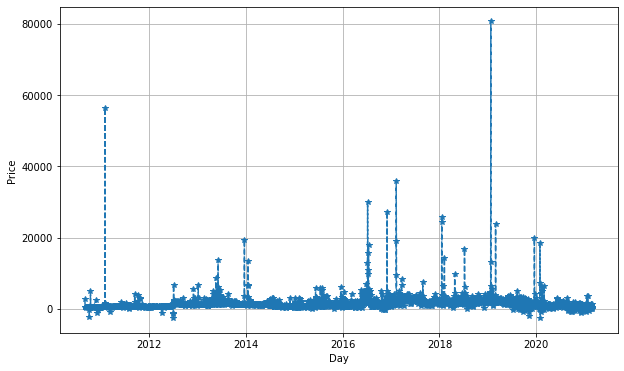

In [8]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Day' )
plt.ylabel( 'Price' )

### Question: Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [9]:
from statsmodels.tsa.stattools import adfuller
SysLoad_adf_result = adfuller(df_daily[ 'SysLoad'])
SysLoad_adf_result 


(-3.6901589888366457,
 0.004253725504574117,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [10]:
from statsmodels.tsa.stattools import adfuller
GasPrice_adf_result = adfuller(df_daily[ 'GasPrice'])
GasPrice_adf_result 

(-2.90276669716518,
 0.04502721288462542,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

### Answer: 0.004254, 0.045027

### Question: Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [11]:
from statsmodels.tsa.stattools import adfuller
ElecPrice_adf_result = adfuller(df_daily[ 'ElecPrice'])
ElecPrice_adf_result 

(-8.269053866873803,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 69130.36360776308)

### Answer: -2.5672, -2.8623

In [12]:
new_df = df_daily.reset_index()

In [13]:
new_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [14]:
new_df = new_df[['FullDate', 'ElecPrice']]

In [15]:
new_df = new_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})

In [16]:
train = new_df[:2757]
test = new_df[2757:]

In [17]:
train.tail()

,ds,y
2752,2018-03-15,2717.340
2753,2018-03-16,2277.335
2754,2018-03-17,1718.385
2755,2018-03-18,1088.015
2756,2018-03-19,1998.305


In [18]:
test.head()

,ds,y
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


In [19]:
!pip install pystan~=2.14
!pip install fbprophet --upgrade --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from fbprophet import Prophet

model = Prophet()

In [21]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
forecast = model.predict(test)

In [23]:
a = np.array(test['y'])
b = np.array(forecast['yhat'])

### Question: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [24]:
def mean_absolute_percentage_error(a, b): 
    return np.round(np.mean(np.abs((a - b) / a)) * 100,2)

mean_absolute_percentage_error(a,b)

549.48

### Answer: 549.48

### Question: What is the RMSE in 2 decimal places?

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(a, b))
print(rms)

3218.15577651241


### Answer: 3218.16

### Question: If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?

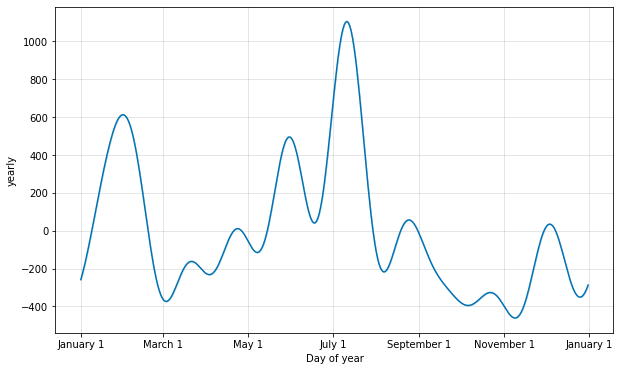

In [26]:
# Yearly seasonality
from fbprophet.plot import plot_yearly
plot_yearly(model)


### Answer: July

In [27]:
df.columns

Index(['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [28]:
# Multivariate time series
n_df = df_daily.reset_index()
n_df = n_df[['FullDate', 'ElecPrice', 'SysLoad', 'Tmax',  'GasPrice']]

n_df = n_df.rename(columns={'FullDate': 'ds', 'ElecPrice': 'y', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3'})
n_df.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [29]:
train2 = n_df.iloc[:2757]
test2 = n_df.iloc[2757:]

In [30]:
model = Prophet()
# Adding regressors
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')


model.fit(train2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
forecast2 = model.predict(test2)

### Question: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [32]:
c = np.array(test2.y)
d = np.array(forecast2.yhat)

mean_absolute_percentage_error(c, d)

231.28

### Answer: 231.28

### Question: What is the RMSE in 2 decimal places?

In [33]:
rmse = sqrt(mean_squared_error(c, d))
rmse

2706.9157225037015

### Answer: 2706.91

### Question: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

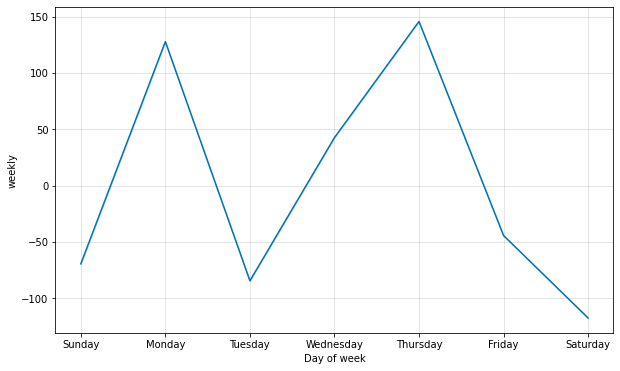

In [34]:
# Weekly seasonality
from fbprophet.plot import plot_weekly
plot_weekly(model)

### Answer: Thursday

In [35]:
n_df.drop(['add2'], axis=1, inplace=True)

In [36]:
train3 = n_df.iloc[:2757]
test3 = n_df.iloc[2757:]

In [37]:
model = Prophet()
# Adding regressors
model.add_regressor('add1')
model.add_regressor('add3')


model.fit(train3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [38]:
forecast3 = model.predict(test3)

### Question: Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max),

### What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [39]:
e = np.array(test3.y)
f = np.array(forecast3.yhat)

mean_absolute_percentage_error(e, f)

233.72

### Answer: 233.72